# EDA FARS (Fatality Analysis Reporting System)

### What is this Dataset about?

<p>Data is for automobiles where the right passenger seat was occupied, with one observation for each such passenger. Observations for vehicles where the most harmful event was a fire or explosion or immersion or gas inhalation, or where someone fell or jumped from the vehicle, are omitted. Data is limited to vehicle body types 1 to 19,48,49,61, or 62. This excludes large trucks, pickup trucks, vans and buses. The 2009 and 2010 data does not include information on whether airbags were installed.
</p>

In [65]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns

#todo: need to shift to plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
from plotly.graph_objs import *
from plotly import tools



# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format

init_notebook_mode(connected=True)         # initiate notebook for offline plot

In [71]:
#helper functions
def bold(text_to_bold):
    """
    Bolds given string.
    args:todo
    returns:todo
    """
    bold = "\033[1m"
    reset = "\033[0;0m"
    return bold + text_to_bold + reset

def count_plot(column, axis, df, percent="no", title="", figure_dim=(12,8)):
    total_rows = df.shape[0]
    plt.figure(figsize=figure_dim)
    plt.title(title)
    if axis == 'x':
        ax = sns.countplot(x=column, data=df)
    elif axis == 'y':
        ax = sns.countplot(y=column, data=df)
    
    if percent == 'show' and axis != 'y':
        for p in ax.patches:
            height=p.get_height()
            percent = (height*100)/total_rows
            total_p = (height*100)/totalrows
            ax.text((p.get_x() + p.get_width()/2), p.get_height()+250, '{:1.1f} %'.format(percent) \
                    + ' / ' + '{:1.1f} %'.format(total_p), ha='center')
def show_unique(column, df):
    
    print "There are {} unique values in column {}\n".format(str(len(df[column].unique())), column)
    

def subplot_data(df, x, legend, normalize=None, showlegend=None):
    """
    todo:
    """
    #todo: add assert, good practice
    normalize = False if normalize is None else normalize
    showlegend = False if showlegend is None else showlegend
    
    ct = pd.crosstab(index=df[x], columns=df[legend], normalize=normalize).rename_axis(None, axis=1).reset_index()
    legend_list = ct.columns[1:]

    #data for chart
    data = [Bar(x=ct[x], y=ct[col], name=str(col), showlegend=showlegend) for col in legend_list]
    return data
    

def stacked_chart(df, x, legend, title=None, barmode=None, xaxistitle=None, yaxistitle=None, normalize=None):
    
    title = "" if title is None else title
    xaxistitle = "" if xaxistitle is None else xaxistitle
    yaxistitle = "" if yaxistitle is None else yaxistitle
    normalize = False if normalize is None else normalize
    barmode = 'stack' if barmode is None else barmode
    
    ct = pd.crosstab(index=df[x], columns=df[legend], normalize=normalize).rename_axis(None, axis=1).reset_index()
    legend_list = ct.columns[1:]
    
    #data for chart
    data = [Bar(x=ct[x], y=ct[col], name=str(col)) for col in legend_list]
    layout = Layout(title=title, barmode=barmode,
                   xaxis=dict(title=xaxistitle,showticklabels=True, type='category'),
                yaxis=dict(title=yaxistitle))
    
    fig = Figure(data=data, layout=layout)
    
    return fig

def addDeathType(row):
    """
    todo:
    """
    if (row.D_injury != 4) & (row.injury != 4):
        return 'None'
    elif (row.D_injury == 4) & (row.injury == 4):
        return 'Both'
    elif (row.D_injury != 4) & (row.injury == 4):
        return 'Psngr'
    else:
        return 'Drvr'
    
    
    
def addpassenger_safteyfeatures(row):
    if row.Restraint == 'yes' and row.airbagAvail == 'yes' and row.airbagDeploy == 'yes':
        return 'SAW_AAD'
    elif row.Restraint == 'yes' and row.airbagAvail == 'yes' and row.airbagDeploy == 'no':
        return 'SAW_AAND'
    elif row.Restraint == 'yes' and row.airbagAvail == 'no' and row.airbagDeploy == 'no':
        return 'SAW_ANA'
    elif row.Restraint == 'no' and row.airbagAvail == 'yes' and row.airbagDeploy == 'yes':
        return 'SNW_AAD'
    else:
        return 'NA'
    
    
    
def adddriver_safteyfeatures(row):
    if row.D_Restraint == 'yes' and row.D_airbagAvail == 'yes' and row.D_airbagDeploy == 'yes':
        return 'SAW_AAD'
    elif row.D_Restraint == 'yes' and row.D_airbagAvail == 'yes' and row.D_airbagDeploy == 'no':
        return 'SAW_AAND'
    elif row.D_Restraint == 'yes' and row.D_airbagAvail == 'no' and row.D_airbagDeploy == 'no':
        return 'SAW_ANA'
    elif row.D_Restraint == 'no' and row.D_airbagAvail == 'yes' and row.D_airbagDeploy == 'yes':
        return 'SNW_AAD'
    else:
        return 'NA'
    
    
    
def seatbelt_use(row):
    if row.Restraint == 'yes' and row.D_Restraint == 'yes':
        return 'PW_DW'
    elif row.Restraint == 'yes' and row.D_Restraint == 'no':
        return 'PW_DNW'
    elif row.Restraint == 'no' and row.D_Restraint == 'yes':
        return 'PNW_DW'
    elif row.Restraint == 'no' and row.D_Restraint == 'no':
        return 'PNW_DNW'
    else:
        return 'NA'
    
    
def factorplot(x_, col_, data_, title_=''):
    g = sns.factorplot(x=x_,
                   col=col_, 
                   data=data_, col_wrap=6, kind="count", size=4, aspect=0.7,
                   sharex=False
                  )
    plt.subplots_adjust(top=0.95)
    g.fig.suptitle(title_)
    # factorplot(x='restraint', cols='year', data=data)
    plt.show()

## File Structure

In [37]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
print "Data shape:"
print "{} Rows x {} Columns".format(str(data.shape[0]), str(data.shape[1]))
data.head(10)
totalrows = data.shape[0]

Data shape:
151158 Rows x 17 Columns


### Variables Defination

<p>There are total 17 variables present in this data-set, which can be divided in to following categories</p>
<p><b>Vehicle:</b></p>
<ul>
<li><b>caseid</b>: Vehicles ID</li>
<li><b>modelyr</b>: Vehicle's model year</li>
<li><b>inimpact</b>:Initial Impact of accident on vehicle (which car side was colided first).</li>
<li><b>airbag</b>: Type of air bag installed in car for ex. only front airbag</li>
<li><b>restraint</b>: type of seatbelts installed in car for ex. only shoulder seatbelt</li>
</ul>
<p><b>Passanger</b>:</p>
<ul>
<li><b>Age</b>: Passenger's Age</li>
<li><b>sex</b>: Passenger's gender</li>
<li><b>injury</b>: Category of passenger's Injury</li>
<li><b>airbagAvail</b>: Passanger's air bag availability.</li>
<li><b>airbagDeploy</b>: Passangers air bag doployment.</li>
<li><b>Restraint</b>: If passanger was wearnig seatbelt or not.</li>
</ul>
<p><b>Driver</b>:</p>
<ul>

<li><b>D_injury</b>: Driver injury category</li>
<li><b>D_airbagAvail</b>: If air bag was available for driver or not</li>
<li><b>D_airbagDeploy</b>: If air bag was deployed or not</li>
<li><b>D_Restraint</b>: If driver was wearing seatbelt or not</li>
</ul>
<p><b>Other</b>:</p>
<ul>
<li><b>state</b>: US State code where accident happend</li>
<li><b>year</b>: year of accident</li>

</ul>


## Let's explore variables of above categories. 

## Category Vehicle

### inimpact: location code of initial impact


In [38]:
inimpact_df = data[['inimpact']]
show_unique('inimpact', data)
print 'Unique categories in inimpact are following:'

There are 24 unique values in column inimpact

Unique categories in inimpact are following:


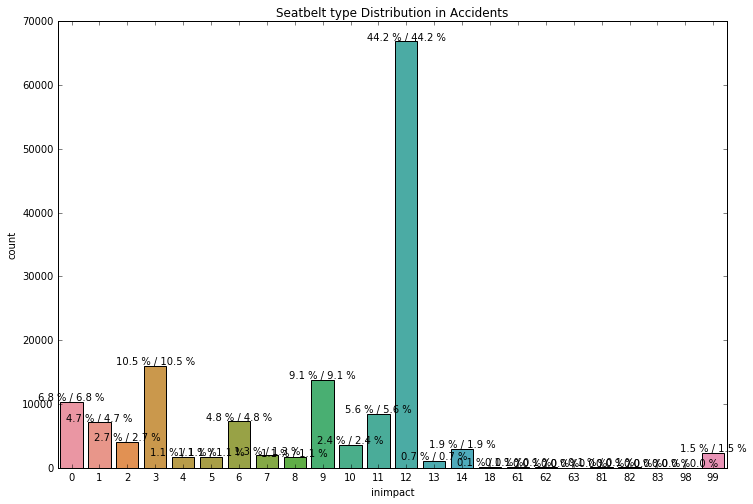

In [39]:
count_plot('inimpact', 'x', data, 'show', 'Seatbelt type Distribution in Accidents')

We can see that in most of the cases initial point of impact was **12 (front)** and then **9 (Driver Side)** and **3 (Passenger Side)** 
 
Desc | Img
- | -
![alt](img/inimpact.png)|![alt](img/inpact2.png)

### airbag: Type of air bag installed in car for ex. only front airbag

There are 15 unique values in column airbag



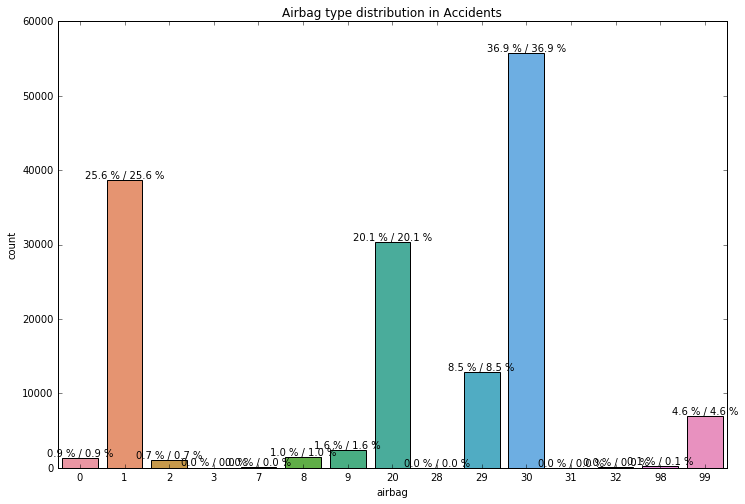

In [40]:
show_unique('airbag', data)
count_plot('airbag', 'x', data, 'show', 'Airbag type distribution in Accidents')

Img | Desc
- | -
![alt](img/airbag.png) |

In almost **36%** of the accidents airbag was not installed.

**25%** when front airbag deployed and **20%** when airbag was avaibale **didn't deploy**

### restraint: type of seatbelts installed in car for ex. only shoulder seatbelt


![alt](img/restraint.png)

There are 15 unique values in column restraint



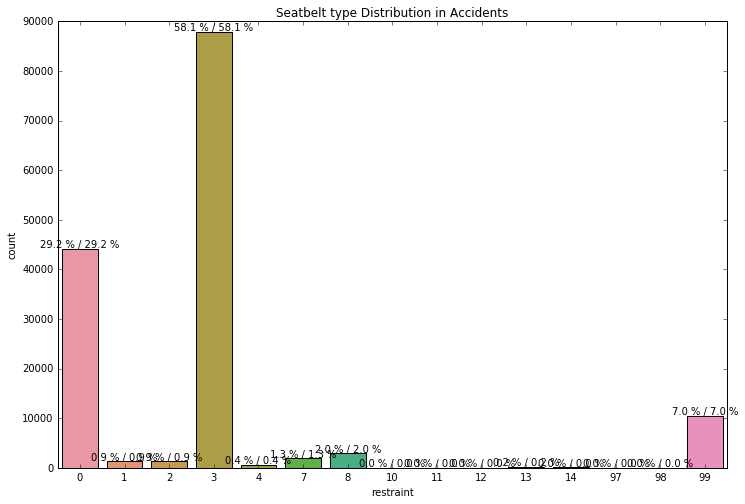

In [41]:
show_unique('restraint', data)
count_plot('restraint', 'x', data, 'show', 'Seatbelt type Distribution in Accidents')

In almost **58%** of accidents shoulder and lap belt was used and in **29%** of the accidents Belt was not applicable.

## Category Passenger and Driver:

### injury and D_injury: Category of  Injury

There are 7 unique values in column injury



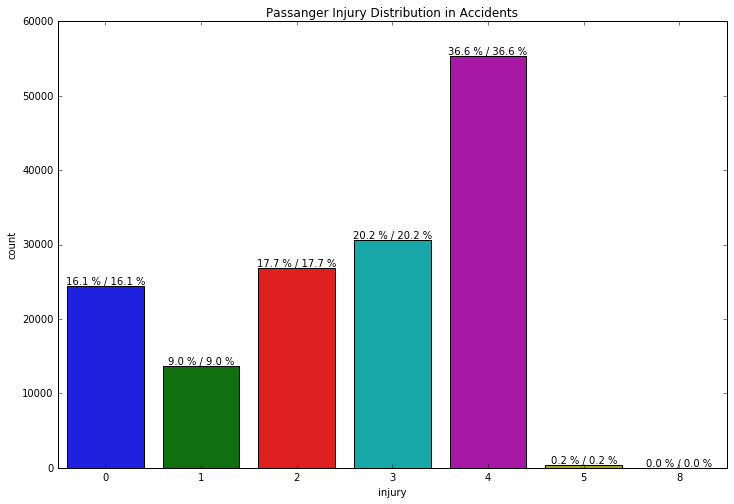

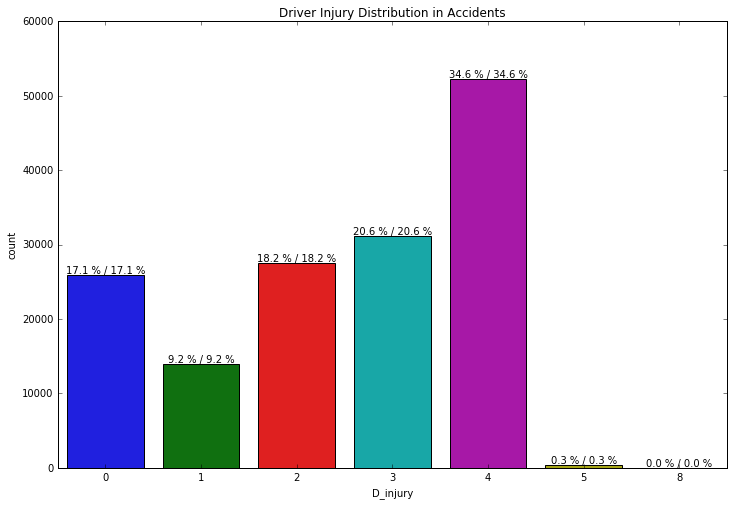

In [42]:
show_unique('injury', data)
count_plot('injury', 'x' , data, 'show', 'Passanger Injury Distribution in Accidents')
count_plot('D_injury', 'x', data, 'show', 'Driver Injury Distribution in Accidents')

**36% passengers**  and **34% drivers** have died with fatal Injury.

More drivers had NO injury than passengers (malfuntioning system?)

Desc | Desc
- | -
![alt](img/injury4.png) |![alt](img/injury1.png) ![alt](img/injury2.png)

### airbagAvail and D_airbagAvail:  air bag availability 

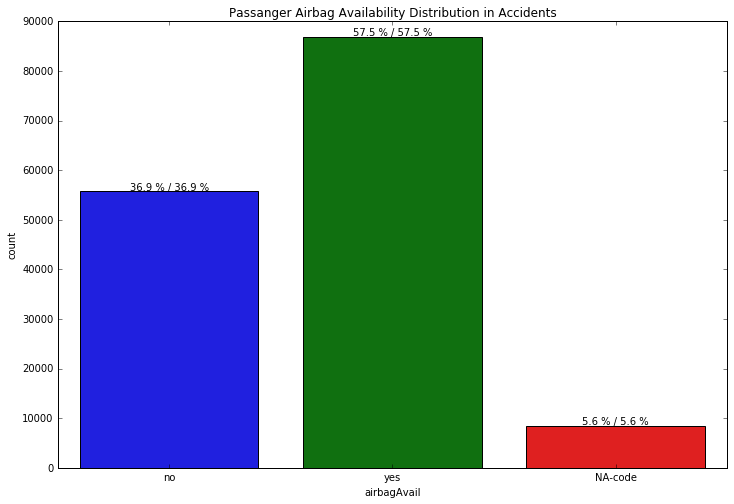

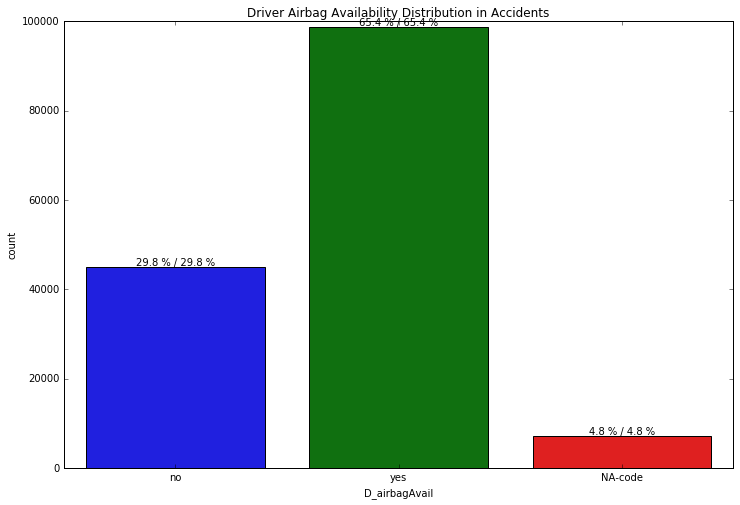

In [43]:
count_plot('airbagAvail','x', data, 'show', 'Passanger Airbag Availability Distribution in Accidents')
count_plot('D_airbagAvail', 'x', data, 'show', 'Driver Airbag Availability Distribution in Accidents')

In most accidents airbag was available for passengers and drivers. 

Some accidents report airbag for driver only

### airbagDeploy and D_ airbagDeploy: air bag doployment 

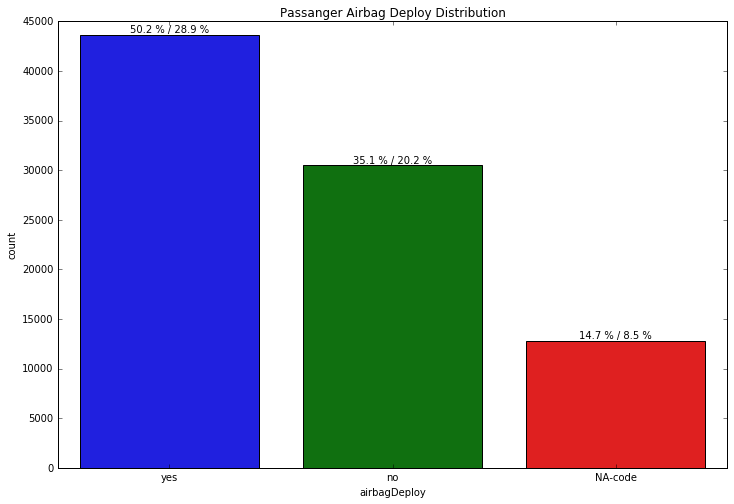

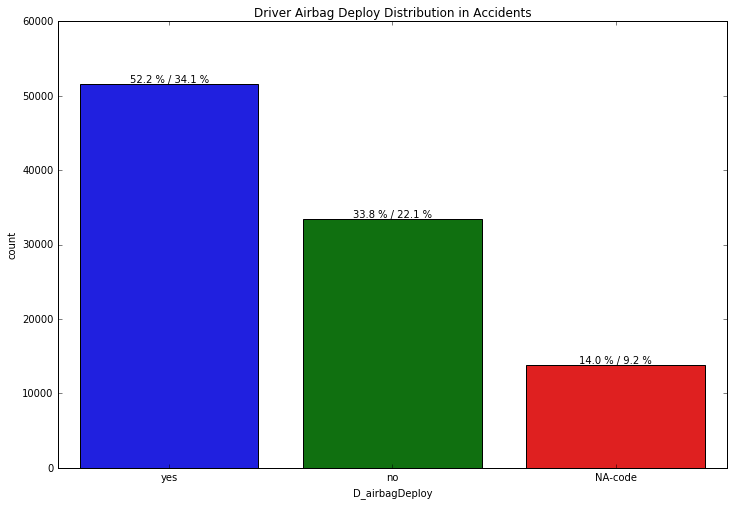

In [44]:
bag_deploy = data[data.airbagAvail == 'yes']
count_plot('airbagDeploy', 'x', bag_deploy, 'show', 'Passanger Airbag Deploy Distribution')
#for driver
bag_deploy = data[data.D_airbagAvail == 'yes']
count_plot('D_airbagDeploy', 'x', bag_deploy, 'show', 'Driver Airbag Deploy Distribution in Accidents')

Only in **35%** cases airbag was not deployed for passenger and in **33%** cases airbag was not deployed for driver.

*May be that's why passengers' death rate is a bit high?*

### Restraint D_Restraint: wearnig seatbelt or not 

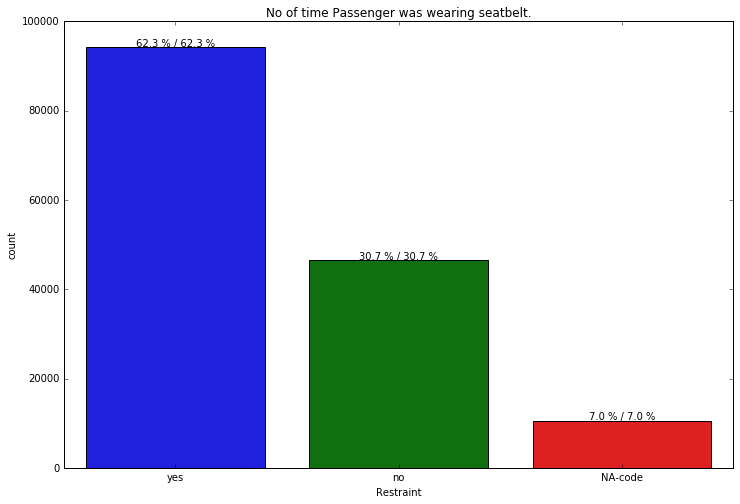

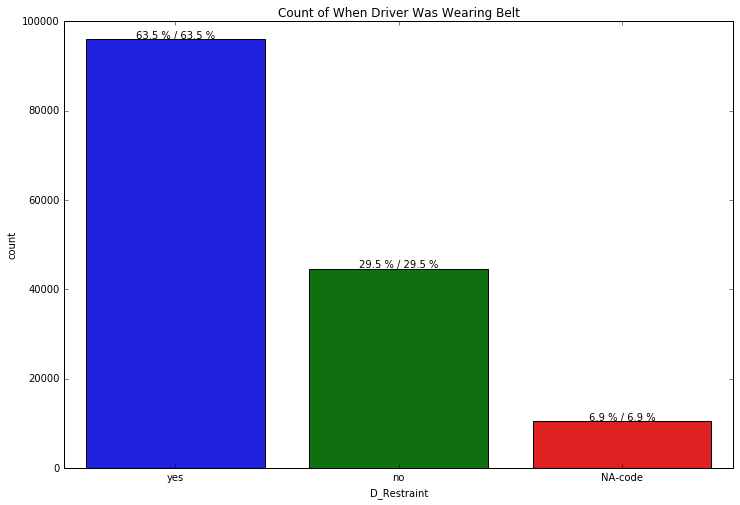

In [45]:
count_plot('Restraint', 'x', data, 'show', 'No of time Passenger was wearing seatbelt.')
count_plot('D_Restraint', 'x', data, 'show', 'Count of When Driver Was Wearing Belt')

In around **30%** of the accidents driver and passenger was not wearning seat belt.

But passengers care for fastening the seat belts a bit more. *Why death rate is high then?*

### Category Other:

### year

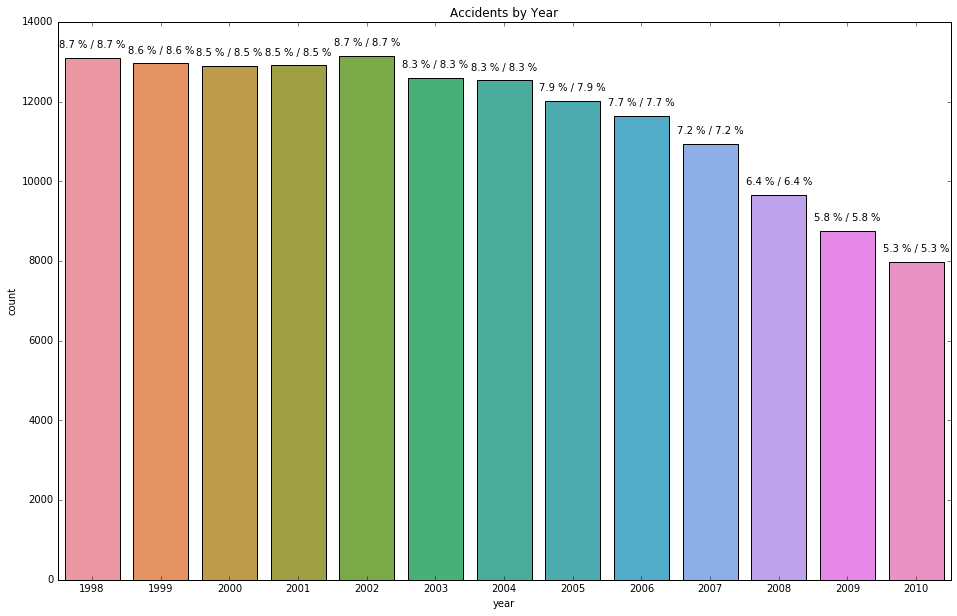

In [46]:
count_plot('year', 'x', data, 'show', 'Accidents by Year', figure_dim=(16,10))

Over the years accidents rate in US is decreasing.

### state: state code of USA where accident happend

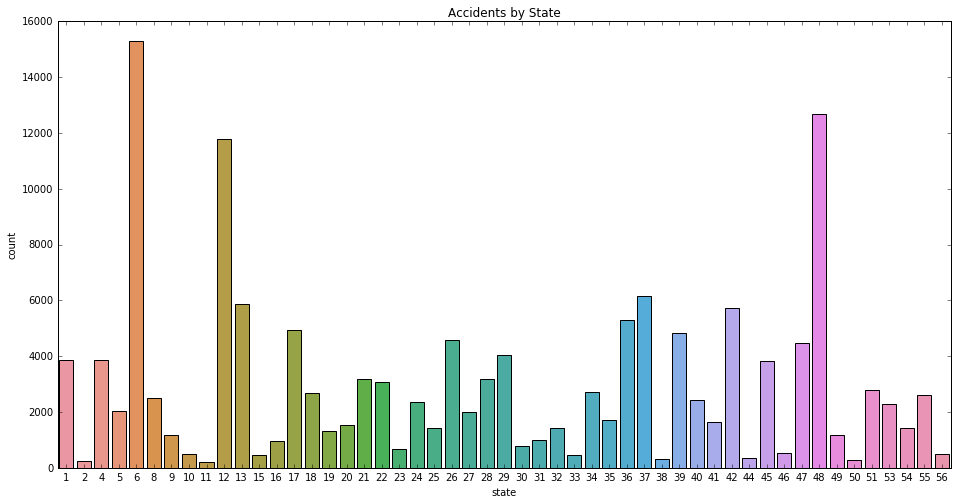

In [47]:
count_plot('state', 'x', data, 'notshow', 'Accidents by State', figure_dim=(16,8))

![alt](img/state number.png)

Mostly accidents have occoured in state **California** and **Texas**.

# Bivariate Analysis

## inimpact:

### Death distribution on initial impacts 

In [48]:
inimpact_df = data[['year', 'state','inimpact', 'injury', 'restraint','airbag', 'Restraint', 'airbagAvail', 'airbagDeploy', 'D_injury',
                  'D_airbagAvail', 'D_airbagDeploy', 'D_Restraint']]
#but first lets generalize impacts types to top front, back, left, right
driverside = [7,8,9,10,11,62,63,61]
passengerside = [1,2,3,4,5,82,83,81]
inimpact_df.loc[inimpact_df.inimpact.isin(driverside), 'inimpact'] = 'D_Side'
inimpact_df.loc[inimpact_df.inimpact.isin(passengerside), 'inimpact'] = 'P_Side'

#add death type for ex. drvr means only driver died in an accident
#todo: find optimized way to perform below manipulation
inimpact_df['who_died'] = inimpact_df.apply(addDeathType, axis=1)

iplot(stacked_chart(df=inimpact_df, x='inimpact', legend='who_died', xaxistitle='Initial Impact', yaxistitle='Ratio', title='Death Distribution by Initial Impacts', normalize='index'))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



As expected, death rate of drivers is more when it hit their side. Same is the case with passengers

### Lets dig down more to see about 44% of the accidents by inimpact 12 

In [49]:
df_filter = (inimpact_df.inimpact == 12)
data_specific_inimpact = inimpact_df[df_filter]

### About Seatbelt (When car hit from front)

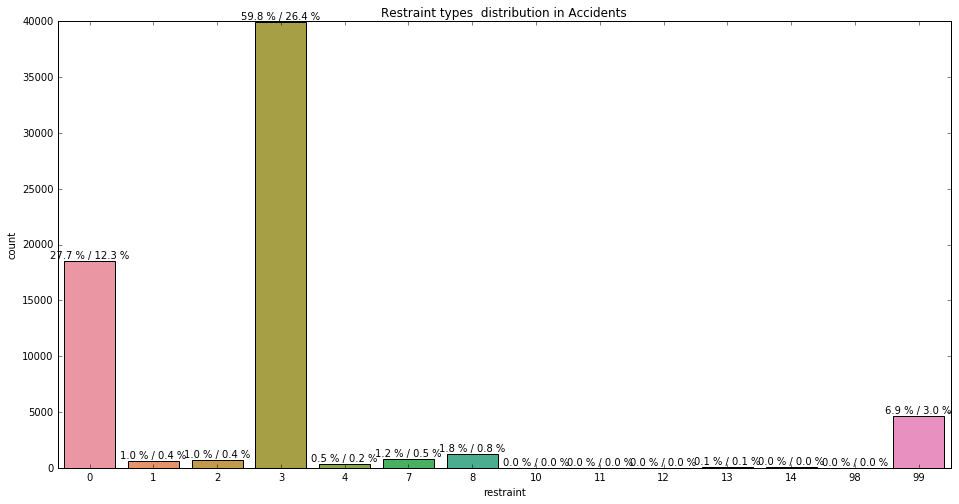

In [50]:
count_plot('restraint', 'x', data_specific_inimpact, 'show', \
           title='Restraint types  distribution in Accidents', figure_dim=(16,8))

**60%** accidents when there was **Shoulder and Lab seatbelt** was available and **27%** where **not applicable.**

### Lets examine effect of seat belt when airbag didn't deploy / wasn't available
#### Stats for Passenger 

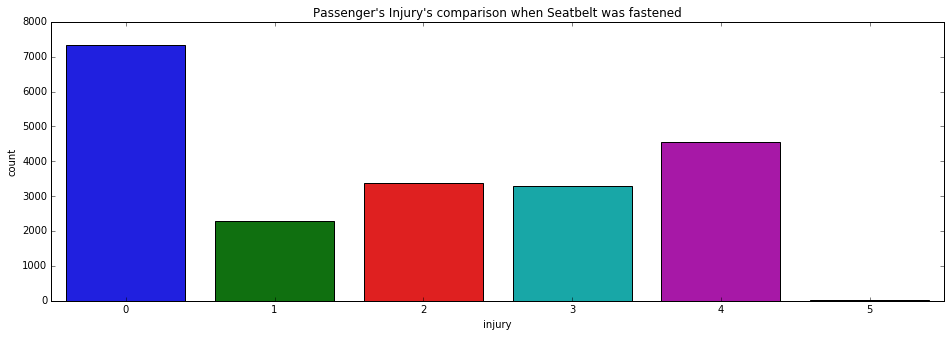

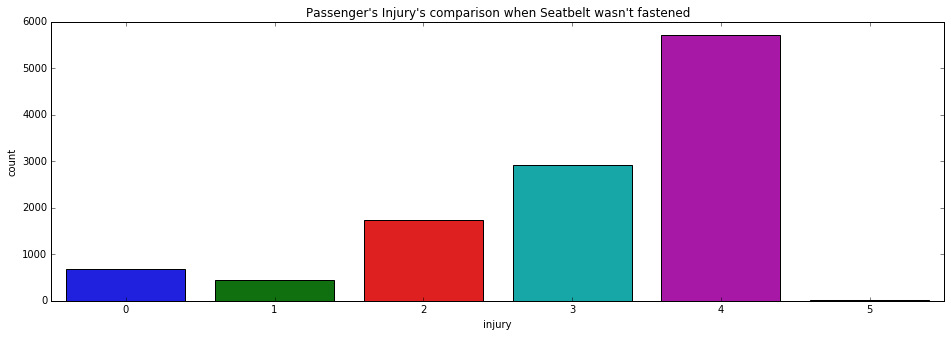

In [51]:
filter_p = (data_specific_inimpact.airbagDeploy == 'no')  & (data_specific_inimpact.Restraint == 'yes')
count_plot('injury', 'x', data_specific_inimpact[filter_p], \
           title='Passenger\'s Injury\'s comparison when Seatbelt was fastened', figure_dim=(16,5))

filter_p = (data_specific_inimpact.airbagDeploy == 'no')  & (data_specific_inimpact.Restraint == 'no')
count_plot('injury', 'x', data_specific_inimpact[filter_p], \
           title='Passenger\'s Injury\'s comparison when Seatbelt wasn\'t fastened', figure_dim=(16,5))

Graphs clearly showed that **seatbelt helps in reduction of deaths and injuries** when seatbelt was fastened when car hit from front and airbag didn't deploy

#### Stats for Driver

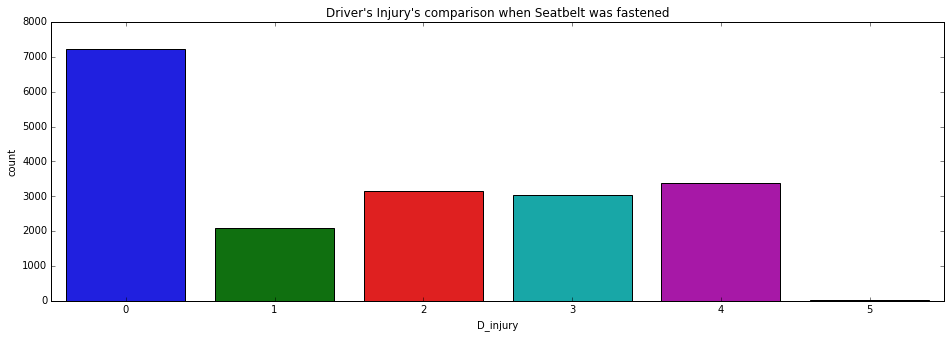

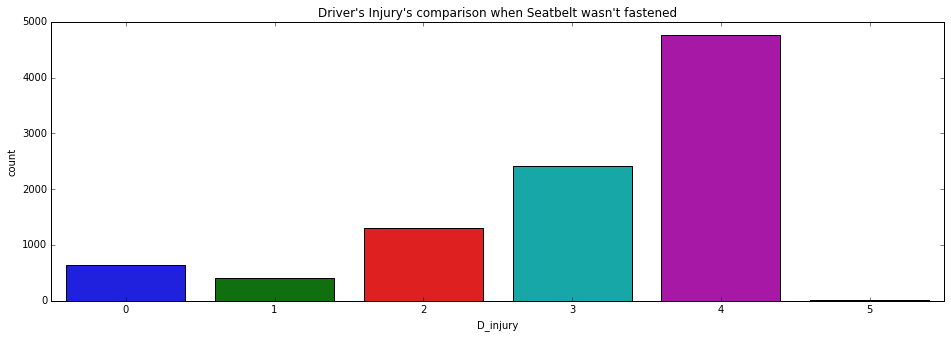

In [52]:
filter_d = (data_specific_inimpact.D_airbagDeploy == 'no') & (data_specific_inimpact.D_Restraint == 'yes')
count_plot('D_injury', 'x', data_specific_inimpact[filter_d], \
           title='Driver\'s Injury\'s comparison when Seatbelt was fastened', figure_dim=(16,5))

filter_p = (data_specific_inimpact.D_airbagDeploy == 'no') & (data_specific_inimpact.D_Restraint == 'no')
count_plot('D_injury', 'x', data_specific_inimpact[filter_p], \
           title='Driver\'s Injury\'s comparison when Seatbelt wasn\'t fastened', figure_dim=(16,5))

Same is the insights for driver. 

**We can conlcude that seatbelt helped in injury and death prevention even if airbag don't deploy**

### Effects of  Airbag

#### Lets see the type of airbag that deployed in case of impact 12

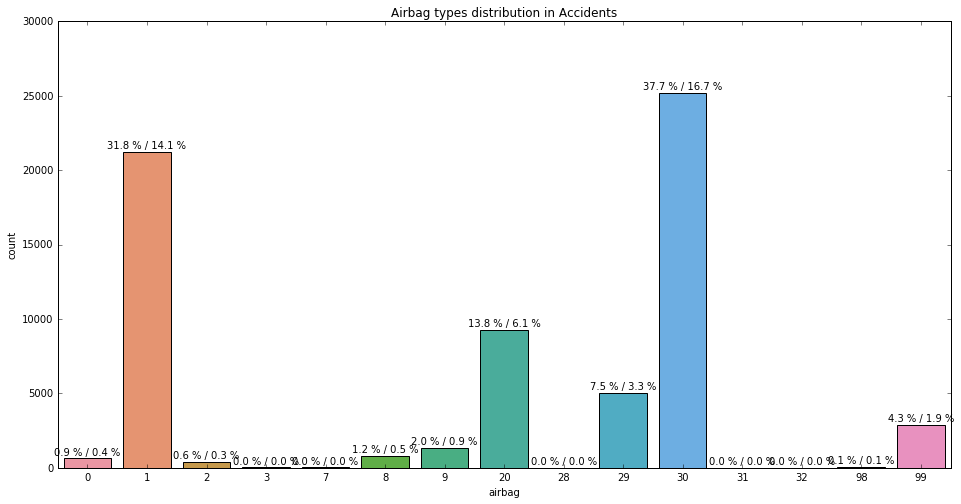

In [53]:
count_plot('airbag', 'x', data_specific_inimpact, 'show', \
           title='Airbag types distribution in Accidents', figure_dim=(16,8))

In **37%** cases, there **wasn't** any airbag **installed** in the car for **both** driver and the passenger.

In **31%** cases where airbag **1** (front) were the airbags that were **deployed**.

In **14%** cases, airbags were installed but **couldn't deployed**

### Airbags deployed successfully? (Available for both passenger and the driver and they DIED)

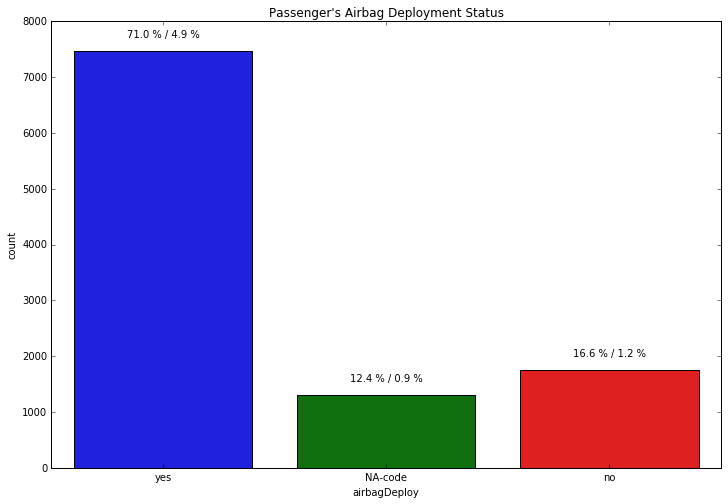

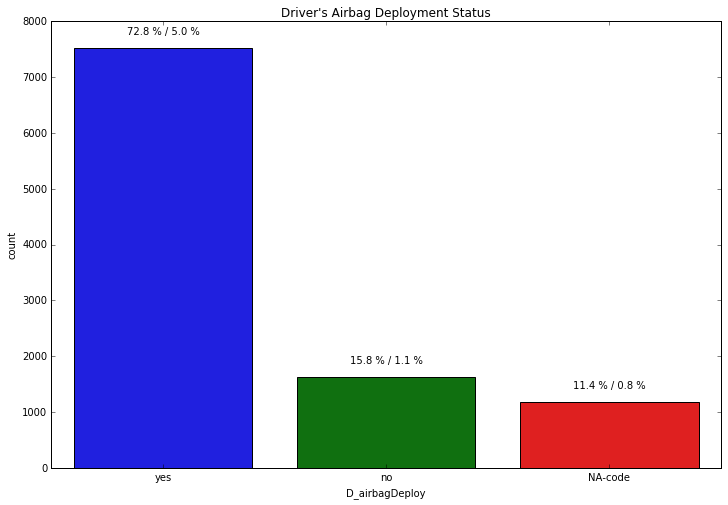

In [54]:
filter_ = (data_specific_inimpact.D_airbagAvail == 'yes') & (data_specific_inimpact.airbagAvail == 'yes')
data_impact_aibagAvail = data_specific_inimpact[filter_]


count_plot('airbagDeploy', 'x', data_impact_aibagAvail[data_impact_aibagAvail.injury == 4], 'show', \
           title='Passenger\'s Airbag Deployment Status') # passenger's airbag deployement status 
count_plot('D_airbagDeploy', 'x', data_impact_aibagAvail[data_impact_aibagAvail.D_injury == 4], 'show', \
           title='Driver\'s Airbag Deployment Status') # driver's airbag deployement status

Around **70%** cases when passenger/driver **died** even when airbag deployed. Seems like airbag didn't help out much to prevent deaths

**16.6%** cases, where **passenger died** and airbag didn't deploy

**15.8%** cases, where **driver died** and airbag didn't work.

## Seatbelt usage in different deaths

In [55]:
seatbelts_df = inimpact_df
#add new column which show seat belt status of passenger and driver both    
seatbelts_df['seatbelt_status'] = seatbelts_df.apply(seatbelt_use, axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [56]:
iplot(stacked_chart(df=seatbelts_df, x='who_died', legend='seatbelt_status', xaxistitle='Who Died', yaxistitle='Ratio', title='Seatbelt usage in different death types', normalize='index'))

It can be seen by the graph that absence of seat belt increases the chances of death  

## Seatbelt Types used over the years

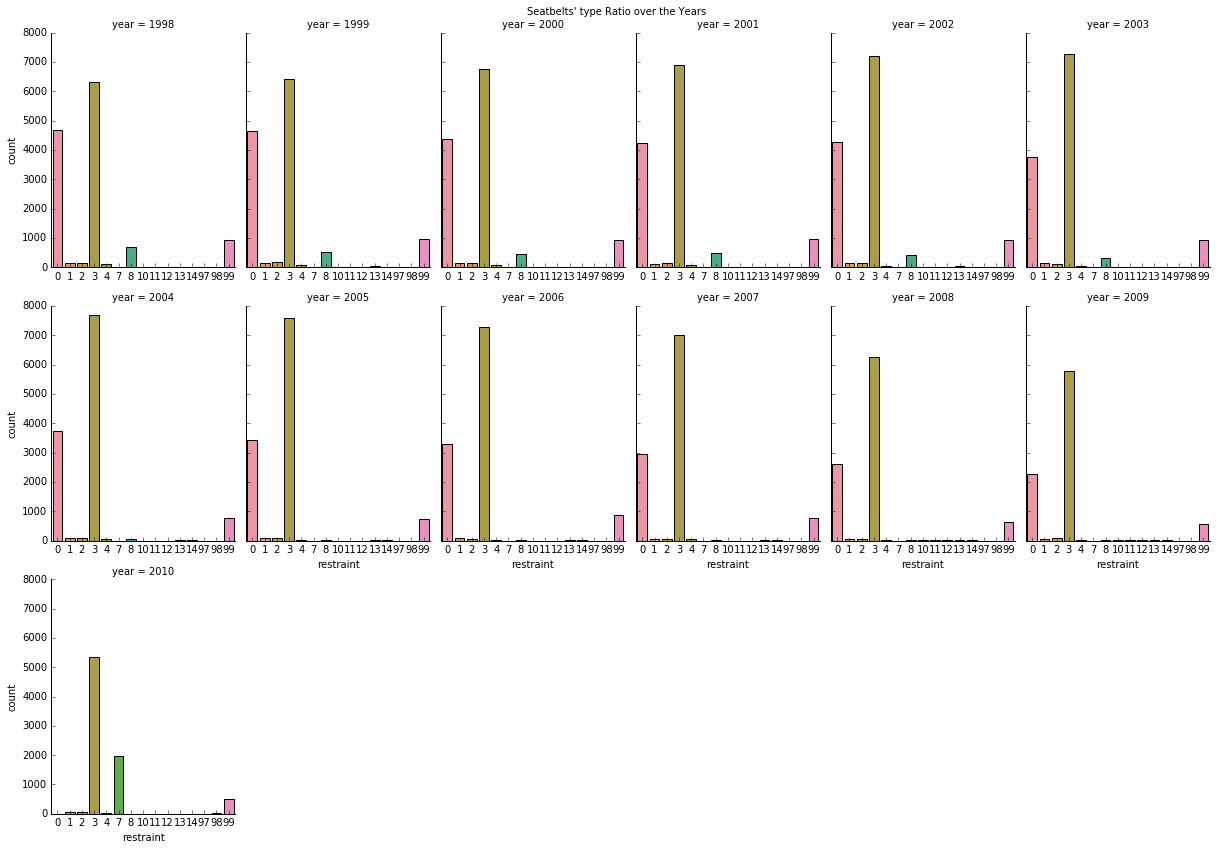

In [57]:
factorplot(x_='restraint', col_='year', data_=data, title_='Seatbelts\' type Ratio over the Years')

Use of shoulder and lab seatbelts are common and not other measure has been taken to install other type of belts.
<br>
In 2010, there was no accident reported where vehicle didn't have seatbelt, But type 07 was installed in many vehicles to prevent deaths

## Airbag availability trend

In [58]:
airbag_df = data[['airbag', 'year']]
#set deployment type = other, to differentiate deployement from availability
airbag_df.loc[airbag_df.airbag != 30, 'airbag'] = 'other'
fig = stacked_chart(df=airbag_df, x='year', legend='airbag', xaxistitle='Year', yaxistitle='Accidents Count', title='Airbag Availability Trend', normalize='index')
iplot(fig)

## Death Trend

In [59]:
deathstrend_df = data[['year', 'state', 'injury', 'restraint','airbag', 'Restraint', 'airbagAvail', 'airbagDeploy', 'D_injury',
                  'D_airbagAvail', 'D_airbagDeploy', 'D_Restraint']]
deathstrend_df['who_died'] = deathstrend_df.apply(addDeathType, axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [75]:
#todo: find optimized method to add column using condition.
#fig = stacked_chart(df=deathstrend_df, x='year', legend='who_died', barmode='grouped', normalize='index', xaxistitle='Year', yaxistitle='Ratio', title='Deaths vs Survival Trend')
#iplot(fig)
#todo: Needs refactoring
fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('First Subplot','Second Subplot'))

plot1_data = subplot_data(df=deathstrend_df, x='year', legend='who_died', normalize='index')
plot2_data = subplot_data(df=deathstrend_df, x='year', legend='who_died', showlegend=True)

for data in plot1_data:
    fig.append_trace(data,1,1)
    
for data in plot2_data:
    fig.append_trace(data, 2, 1)

fig['layout'].update(title='subplots', barmode='stack')


fig['layout']['xaxis1'].update(title='xaxis 1 title',showticklabels=True, type='category')
fig['layout']['xaxis2'].update(title='xaxis 2 title',showticklabels=True, type='category')

fig['layout']['yaxis1'].update(title='yaxis 1 title')
fig['layout']['yaxis2'].update(title='yaxis 2 title')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



We can clearly see that the death ratio is same over the years

## Accidents in top 5 states

In [61]:
topstates_df = data[['year', 'state', 'injury', 'restraint','airbag', 'Restraint', 'airbagAvail', 'airbagDeploy', 'D_injury',
                  'D_airbagAvail', 'D_airbagDeploy', 'D_Restraint']]
top5states = topstates_df.state.value_counts().keys()[0:5]
top5states_df = topstates_df[topstates_df.state.isin(top5states)]
#top5states_df.state.unique()

In [62]:
#todo: find optimized method to add column using condition.
top5states_df['who_died'] = top5states_df.apply(addDeathType, axis=1)
top5states_df['seatbelt_status'] = top5states_df.apply(seatbelt_use, axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### Seat belt use in top states

In [63]:
iplot(stacked_chart(df=top5states_df, x='state', legend='seatbelt_status', xaxistitle='State', yaxistitle='Ratio', title='Seat belt use in different states', normalize='index', barmode='grouped'))

Drivers and passengers wear seatbelts more often in states where the accidents' chances are high.
e.g California (6)

** We can spread awareness of seatbelts in the areas where ratio of persons is high who don't wear seatbelts by showing them how seatbelt effects the reduction of injuries and deaths **

###  Death distribution in top states

In [64]:
#record of people only who died
deathonly_df = top5states_df[top5states_df.who_died != 'None']

fig = stacked_chart(df=deathonly_df, x='state', legend='who_died', barmode='grouped', normalize='index', xaxistitle='State', yaxistitle='Ratio', title='Death Distribution in Top States')
iplot(fig)